In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns 


Here the column "created_at", has been modified using EXCEL in order to remove the Time specification from the column and the 
column name has been modified to "Date"


In [17]:
df = pd.read_csv(r'C:\Users\mohamed malhan\Desktop\ml\Port Harcourt, Nigeria (4.80678 7.002953).csv')
df.head()

,Date,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26,2021-07-26 16:45:59 UTC,198,89,50,40.78
1,2021-07-26,2021-07-26 16:48:03 UTC,199,89,50,40.09
2,2021-07-26,2021-07-26 16:49:59 UTC,200,89,50,37.93
3,2021-07-26,2021-07-26 16:54:03 UTC,201,89,50,33.18
4,2021-07-26,2021-07-26 16:55:59 UTC,202,89,50,37.84


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             56052 non-null  object 
 1   created_at       56052 non-null  object 
 2   entry_id         56052 non-null  int64  
 3   Temperature_F    56052 non-null  int64  
 4   Humidity_%       56052 non-null  int64  
 5   PM2.5_ATM_ug/m3  56052 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.6+ MB


In [4]:
#Removig the unwanted columns ("entry_id","created_at") and replacing the name of the column

df.rename(columns ={'PM2.5_ATM_ug/m3':"PM2.5_value"}, inplace=True )
df = df.drop(columns=['entry_id','created_at'])
df

,Date,Temperature_F,Humidity_%,PM2.5_value
0,2021-07-26,89,50,40.78
1,2021-07-26,89,50,40.09
2,2021-07-26,89,50,37.93
3,2021-07-26,89,50,33.18
4,2021-07-26,89,50,37.84
...,...,...,...,...
56047,2021-10-25,87,61,29.17
56048,2021-10-25,87,61,29.57
56049,2021-10-25,87,61,28.75
56050,2021-10-25,87,61,29.97


In [5]:
df.describe()


,Temperature_F,Humidity_%,PM2.5_value
count,56052.000000,56052.000000,56052.000000
mean,84.821469,65.117766,54.391926
std,4.319505,8.550730,42.205997
min,70.000000,29.000000,0.780000
25%,82.000000,61.000000,30.170000
50%,84.000000,68.000000,41.450000
75%,87.000000,71.000000,61.190000
max,108.000000,89.000000,568.080000


In [6]:
#Converting the values from float to int datatype

df['PM2.5_value'] = df['PM2.5_value'].astype(int)
df.dtypes

Date             object
Temperature_F     int64
Humidity_%        int64
PM2.5_value       int32
dtype: object

# Correlation Between The Fields 

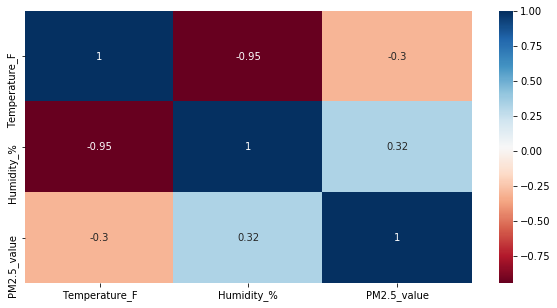

In [7]:
df.corr()
py.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot= True, cmap='RdBu')
py.show()

# It is evident that the "PM2.5 value" is correlating more on Humidity than on the tempereature 

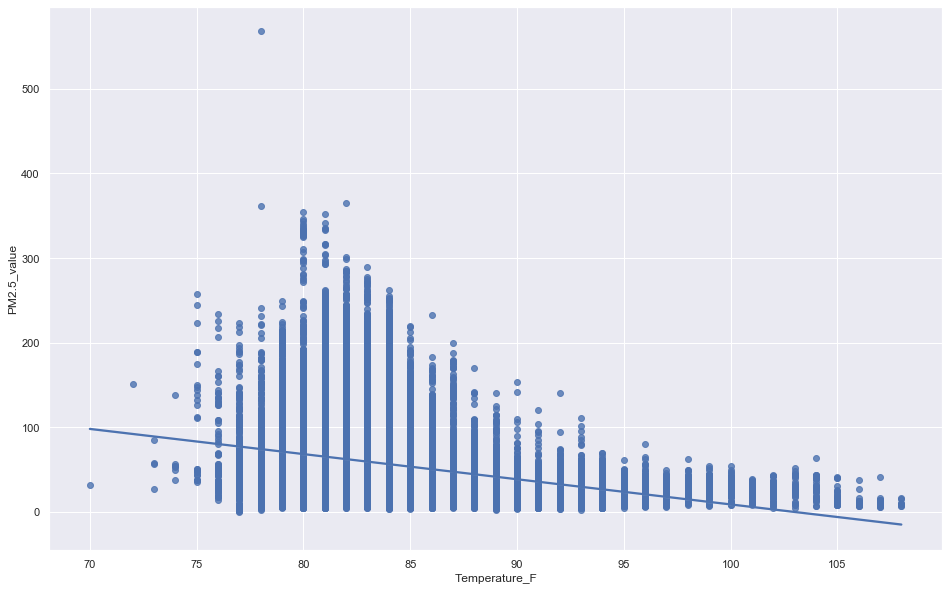

In [9]:
sns. regplot(x='Temperature_F', y='PM2.5_value', data=df)
sns.set(rc={"figure.figsize":(16,10)})

# The down-trend of the line shows that the PM2.5 value decreases with increase in temperature

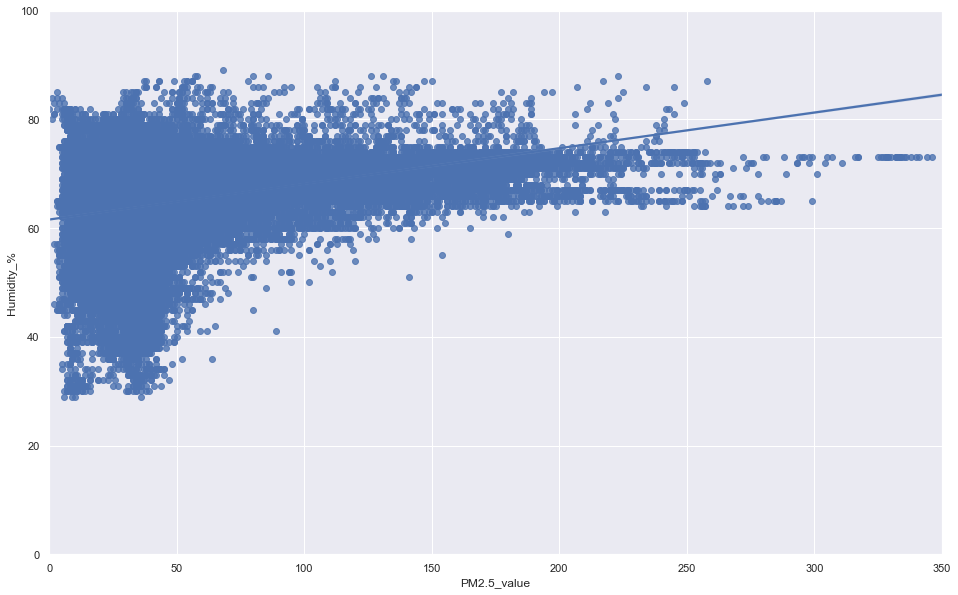

In [10]:
sns. regplot(x='PM2.5_value', y='Humidity_%', data=df)
py.ylim(0,100)
py.xlim(0,350)
sns.set(rc={"figure.figsize":(16,10)})

# By the up-trend of the line we can suggest that there is a rise in PM2.5 value when the Humidity increases 

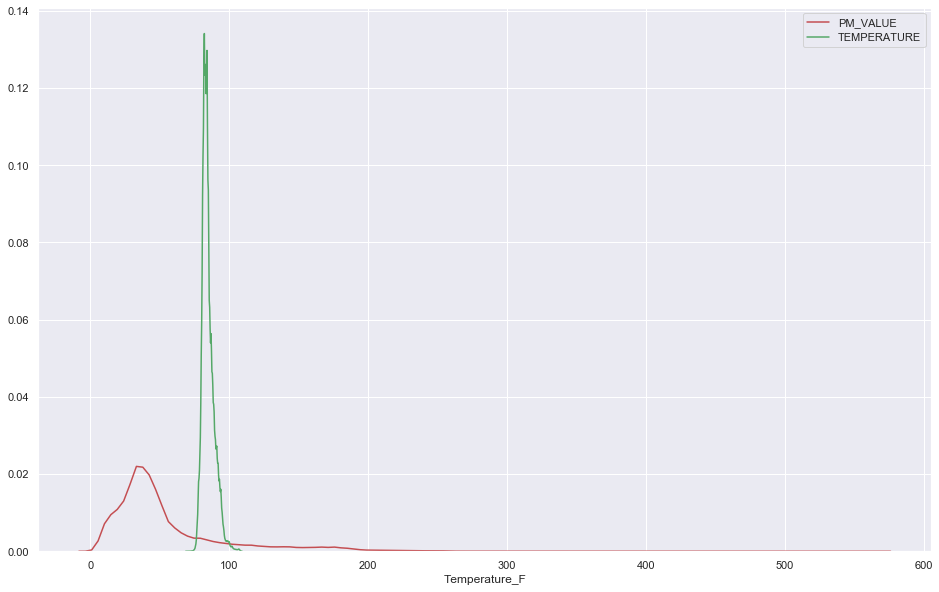

In [11]:
ax1 = sns.distplot(df['PM2.5_value'], hist=False ,color='r' , label='PM_VALUE')
sns.distplot(df['Temperature_F'],hist=False , color='g' , label ='TEMPERATURE', ax = ax1)

#By the distribution plot we could conclude that the temperature does not contribute to the PM level. 

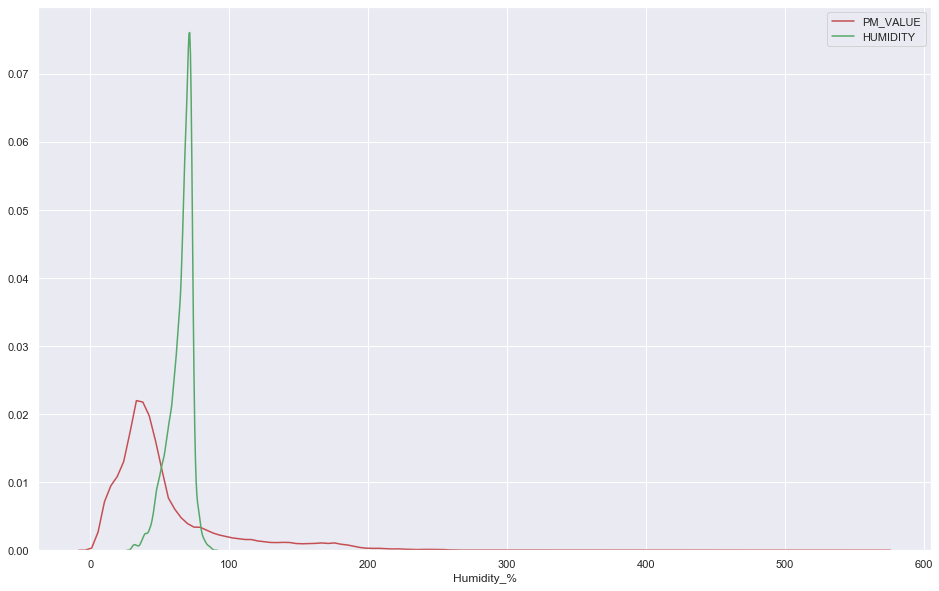

In [12]:
ax1 = sns.distplot(df['PM2.5_value'], hist=False ,color='r' , label='PM_VALUE')
sns.distplot(df['Humidity_%'],hist=False , color='g' , label ='HUMIDITY', ax = ax1)

# The distinct curves clearly shows that the dependency of Humidity to that of PM level is considerably low.

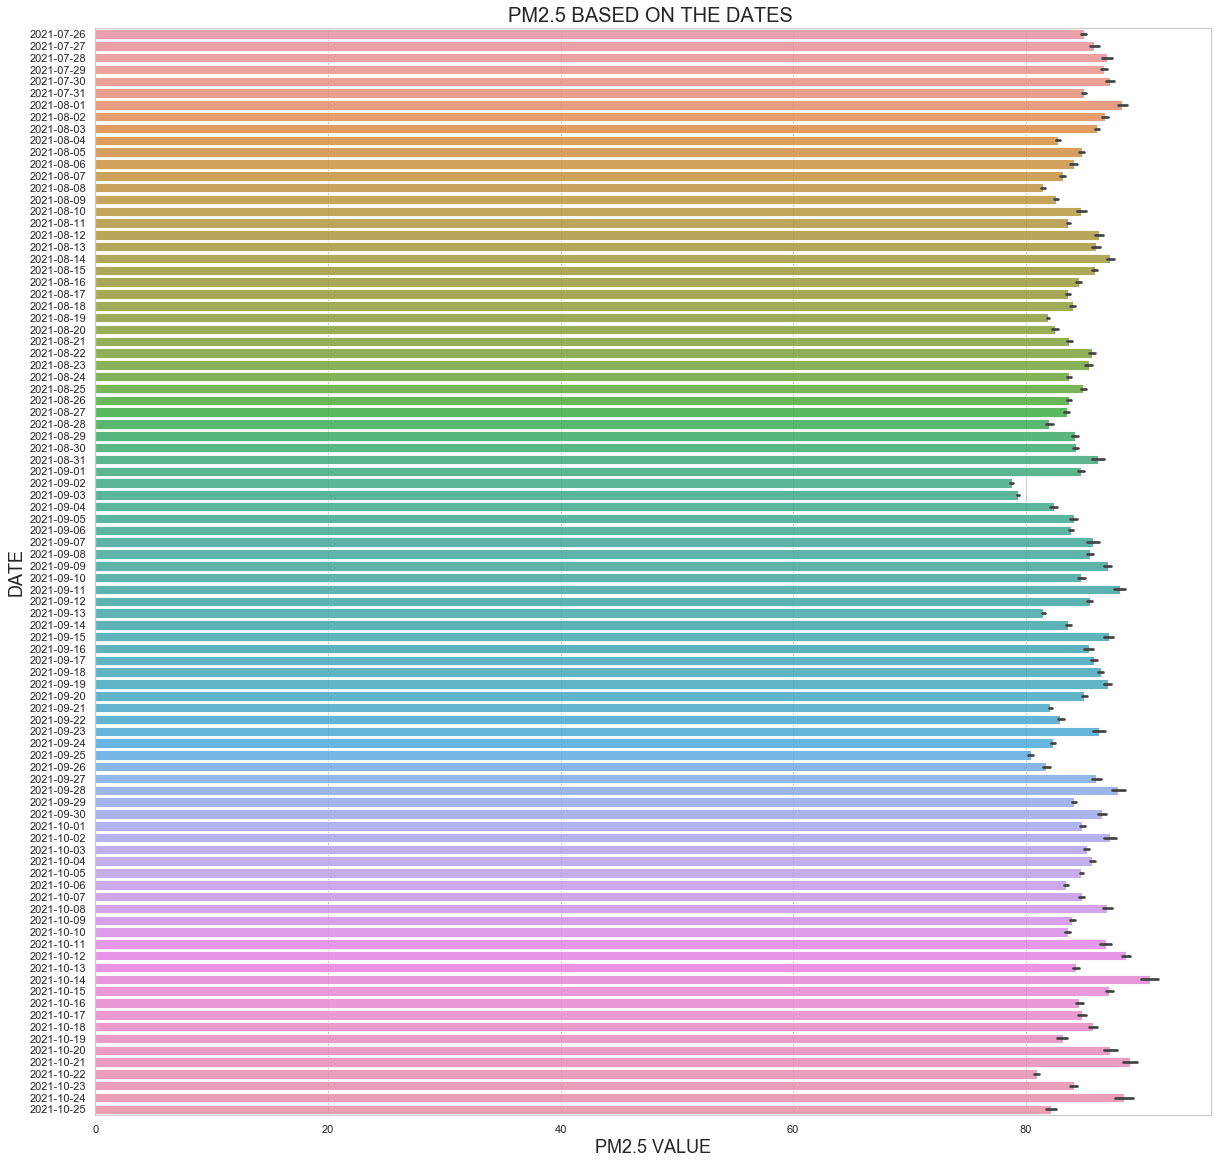

In [13]:
""""By ploting barplot between dates and the PM2.5 values we can analyse the exact day at which there is 
 a maximum PM level present in the atmosphere """


f = py.figure()
f.set_figwidth(20)
f.set_figheight(20)

sns.set(style="whitegrid")
sns.barplot(df['Temperature_F'], df['Date'], alpha=0.9)
py.title('PM2.5 BASED ON THE DATES ' , fontsize = 20)
py.ylabel('DATE', fontsize=18)
py.xlabel('PM2.5 VALUE', fontsize=18)
py.show()

# The color indication helps in the identification of different months


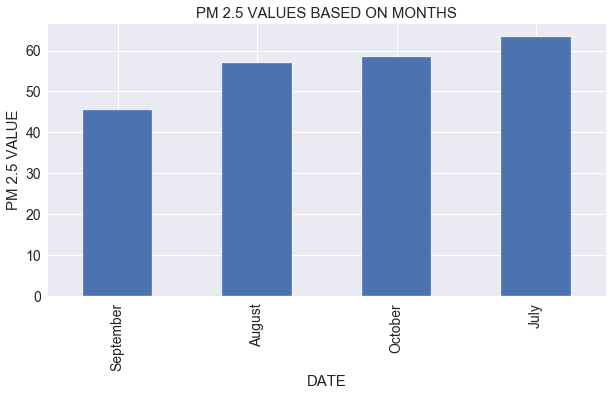

In [14]:
#For a better view we can have the months and the respective PM levels 

df['Date'] = pd.to_datetime(df['Date'])
Dates = df.groupby(df['Date'].dt.strftime('%B'))['PM2.5_value'].mean().sort_values()

py.style.use('seaborn')
Dates.plot(kind='bar' ,figsize=(10,5) , fontsize=14 )
py.xlabel('DATE',fontsize=15)
py.ylabel('PM 2.5 VALUE',fontsize=15)
py.title('PM 2.5 VALUES BASED ON MONTHS',fontsize =15)
py.show()

# It is obvious that " July " month has recorded a highest PM value followed by the months october , august and september.
# We can also note that there is a down trend from July to September but again it has rised in the month of August.

# Conclution


1)The Temperature's dependency over the PM2.5 level in the atmosphere is almost negligible.
2)The Humidity has no greater effects on the level of Particle Matter present in the atmosphere.
3)By analysing the dates we can observe that the PM values are random for each date and does not follow any trend or pattern.
4)The month of 'July' has comparatively lower data samples than other months but give a decent prediction, with highest PM value.
5)By observing the Down trend from the month of 'july to september' , there is again a rise in the PM level by 'October' month.